# Importing packages and loading data

In [40]:
#LOAD AND IMPORT PACKAGES AND DATA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cptac
import os

os.chdir('/Users/andreavelazquez/Desktop/School stuff/QBIO490/qbio_490_AndreaV/analysis_data')
cptac.download('Ovarian')

True

In [41]:
#PULL DATA
#clinical data
ov= cptac.Ovarian()
clinical_data= ov.get_clinical()

#protein data
protein_data= ov.get_proteomics()
protein_data.columns = protein_data.columns.get_level_values(0) 

#transcriptomic data
rna_data= ov.get_transcriptomics()

# Data preprocessing

In [53]:
#CLEANUP FROM COLUMNS WITH NO VALUES
#Change NaN values to 0 so we can get rid of them
rna_data = rna_data.replace(0, np.nan)

#Cleanup rna df
gene_na_mask = rna_data.isna().sum() == 0
rna_masked = rna_data.loc[:, gene_na_mask]
#logscale
rna_masked= np.log2(rna_masked)

#Cleanup proteins df
protein_na_mask = protein_data.isna().sum() == 0
proteins_masked = protein_data.loc[:, protein_na_mask]

In [65]:
#Eihter 
proteins_pt= list(proteins_masked.index)
proteins_pt

['01OV007',
 '01OV017',
 '01OV018',
 '01OV023',
 '01OV026',
 '01OV029',
 '01OV030',
 '01OV039',
 '01OV041',
 '01OV047',
 '02OV005',
 '02OV006',
 '02OV008',
 '02OV015',
 '02OV022',
 '02OV023',
 '02OV029',
 '02OV032',
 '02OV036',
 '02OV041',
 '02OV044',
 '02OV046',
 '04OV001',
 '04OV004',
 '04OV005',
 '04OV008',
 '04OV011',
 '04OV012',
 '04OV013',
 '04OV017',
 '04OV018',
 '04OV021',
 '04OV023',
 '04OV024',
 '04OV027',
 '04OV028',
 '04OV031',
 '04OV033',
 '04OV036',
 '04OV037',
 '04OV039',
 '04OV040',
 '04OV044',
 '04OV045',
 '04OV048',
 '04OV049',
 '04OV050',
 '04OV051',
 '04OV053',
 '04OV054',
 '04OV055',
 '04OV057',
 '04OV058',
 '04OV063',
 '11OV002',
 '13OV003',
 '14OV011',
 '15OV001',
 '17OV001',
 '17OV002',
 '17OV010',
 '17OV011',
 '17OV013',
 '17OV014',
 '17OV015',
 '17OV017',
 '17OV018',
 '17OV025',
 '17OV027',
 '17OV028',
 '17OV029',
 '17OV030',
 '17OV033',
 '17OV036',
 '17OV039',
 '17OV040',
 '18OV001',
 '20OV005',
 '26OV002',
 '26OV008',
 '26OV009',
 '26OV011',
 '26OV013',
 '01

# Consolidating gene list

In [43]:
#GENE LIST FROM EXPLORATORY DATA ANALYSIS WITH TCGA DATA IN R
top53_R= ['TP53', 'TTN', 'CSMD3', 'USH2A', 'NF1', 'RYR2', 
          'MUC16', 'HMCN1', 'FAT3', 'FLG2', 'MACF1', 'SI', 
          'AHNAK', 'MUC17', 'APOB', 'FLG', 'DNAH3', 'LRP1B', 
          'CDK12', 'DST', 'DNAH5', 'LRP1', 'BRCA1', 'SYNE2', 
          'FCGBP', 'SYNE1', 'TG', 'TOP2A', 'DNAH10', 'RB1',
          'RELN', 'COL6A3', 'DNAH8', 'MDN1', 'ADGRV1', 'HUWE1', 
          'MYH4', 'KMT2C', 'TENM1', 'TACC2', 'DYNC1H1', 'PKHD1', 
          'NEB', 'RYR1', 'LRP2', 'CSMD1', 'DMD', 'IGSF10', 
          'LRRK2', 'ZFHX4', 'MYH1', 'KMT2A', 'VPS13B' ]

In [44]:
#GENE LIST FROM LITERATURE REVIEW
lit_genes= ['CLDN3', 'CLDN4', 'HE4', 'CRIP1', 'APOE', 
            'APOJ', 'HLA-DRA', 'HLA-DRB', 'MUC1', 'BCAM', 
            'BUB1B', 'BUB1', 'TTK', 'CCNB1', 'BRCA1', 
            'BRCA2', 'CSMD3', 'MUCI16', 'APOB', 'DST', 
            'FAT3', 'HMCN1', 'RYR1','TP53','TTN', 
            'USH2A', 'AKT1', 'ARID1A', 'FBXW7', 'FGFR2', 
            'JAK1', 'KRAS', 'MLH1', 'MSH2', 'MSH6', 
            'NRAS', 'PIK3CA', 'PIK3R1', 'PIK3R2', 'PMS2', 
            'POLE', 'PPP2R1A', 'PTEN', 'RNF43', 'RPL22', 
            'SMARCA4', 'STK11', 'SPOP', 'FOXL2', 'CTNNB1', 
            'BRAF']

In [45]:
#Combine both lists into one without duplicates
final_list= join_lists(top53_R, lit_genes)

CLDN3  added to new list
CLDN4  added to new list
HE4  added to new list
CRIP1  added to new list
APOE  added to new list
APOJ  added to new list
HLA-DRA  added to new list
HLA-DRB  added to new list
MUC1  added to new list
BCAM  added to new list
BUB1B  added to new list
BUB1  added to new list
TTK  added to new list
CCNB1  added to new list
BRCA2  added to new list
MUCI16  added to new list
AKT1  added to new list
ARID1A  added to new list
FBXW7  added to new list
FGFR2  added to new list
JAK1  added to new list
KRAS  added to new list
MLH1  added to new list
MSH2  added to new list
MSH6  added to new list
NRAS  added to new list
PIK3CA  added to new list
PIK3R1  added to new list
PIK3R2  added to new list
PMS2  added to new list
POLE  added to new list
PPP2R1A  added to new list
PTEN  added to new list
RNF43  added to new list
RPL22  added to new list
SMARCA4  added to new list
STK11  added to new list
SPOP  added to new list
FOXL2  added to new list
CTNNB1  added to new list
BRAF  

In [46]:
#CHECK WE HAVE INFO FOR THOSE GENES (CHECK THEY ARE IN DFs)
#inDF function for proteomic data 
in_proteins_df= inDF(final_list, proteins_masked)

#make copy of list to use as parameter for search in the rna df
not_in_proteins= in_proteins_df[1].copy()

#search for the remaining ones in transcriptomic data
in_rna_df= inDF(not_in_proteins, rna_masked)

#save list of genes not found in proteomic nor transcriptomic data 
#for future reference
not_in_either= in_rna_df[1].copy()
print("Not in either df: ", not_in_either)

Not in either df:  ['CSMD3', 'USH2A', 'FAT3', 'FLG2', 'SI', 'MUC17', 'FLG', 'DNAH3', 'DNAH5', 'BRCA1', 'TG', 'DNAH10', 'RELN', 'DNAH8', 'ADGRV1', 'TENM1', 'PKHD1', 'RYR1', 'CSMD1', 'IGSF10', 'HE4', 'APOJ', 'HLA-DRB', 'BUB1B', 'BUB1', 'BRCA2', 'MUCI16', 'PMS2', 'RNF43', 'SPOP', 'FOXL2']


In [47]:
#ENSURE WE HAVE DATA FOR SPECIFIC GENES IN A GIVEN DF 
# =====inDF function=====
#output produces 2 lists:
#     -1st element[0]=is in df, 
#     -2nd element[1]=not in df
#========================
def inDF(genes, df):
    results=[]
    final=[]
    no_info=[]
    
    for i in range(len(genes)):
        #see if gene exists in df columns 
        exists= genes[i] in df.columns
        
        #gene doesn't exist, need to add it to our noinfo list
        if exists == 0:
            no_info.append(genes[i])
        #or it exists so it makes it to our final list of relevant genes
        else:
            final.append(genes[i])
    
    #finally, we add both lists to our output list
    results.append(final)
    results.append(no_info)
    
    return results

In [48]:
#JOIN TWO LISTS, WITHOUT DUPLICATES
# =====join_lists function=====
#newlist= unique in both
#==============================
#list2= smaller list! for better runtime 
#(i.e. list1 being of higher magnitude than list2 in the # of genes)
#like looking for 3 specific genes in 1000 genes, and so on
def join_lists(list1, list2):
    #make copy of first list to use as starting point
    joint= list1.copy()
    
    #go through each gene from list2
    for i in range(len(list2)):
        #see if it exists in our joint list
        exist= joint.count(list2[i])
        
        #if it exists, ignore it and go onto next iteration
        if exist!=0:
            continue
            
        #if not, print a statement and add it to the joint list
        print(list2[i], " added to new list")
        joint.append(list2[i])
    
    #return list without duplicates 
    return joint

# Making new df w/ genes we will use in our model

In [165]:
#LOAD PACKAGES
from sklearn.preprocessing import StandardScaler

In [197]:
#MAKE NEW DF WE WILL FEED THE MODEL
#copy genes from proteomic df
litindf= inDF(lit_genes, proteins_masked)
litinrna=inDF(lit_genes, rna_masked)

finalinrna= inDF(final_list, rna_masked)
cleaned_proteomics= proteins_masked.loc[: , litindf[0]]
#cleaned_proteomics= proteins_masked.loc[: , in_proteins_df[0]]

cleaned_transcriptomics= rna_masked.loc[: , in_rna_df[0]]
#cleaned_transcriptomics= rna_masked.loc[: , litinrna[0]]
#cleaned_transcriptomics= rna_masked.loc[: , finalinrna[0]]



#For now just using proteomics data
cleaned_proteomics

Name,CLDN3,CLDN4,CRIP1,APOE,HLA-DRA,MUC1,BCAM,TTK,CCNB1,APOB,...,PIK3R1,PIK3R2,PPP2R1A,PTEN,RPL22,SMARCA4,SMARCA4,STK11,CTNNB1,BRAF
Patient_ID,,,,,,,,,,,,,,,,,,,,,
01OV007,0.185519,-0.257541,-0.213333,0.291589,0.840320,0.211688,-0.318689,-0.793418,-1.006732,0.429509,...,0.186794,0.099217,0.132631,0.509384,-0.085942,-0.130132,-0.132425,0.189093,0.035435,0.046808
01OV017,0.767345,0.985444,0.142211,0.268570,0.486192,1.093341,0.612583,0.607400,1.327091,-0.484390,...,-0.002941,0.121066,0.285331,-0.425281,-0.302595,0.081485,0.079253,-0.256113,0.308028,-0.025705
01OV018,-0.317356,0.282343,-1.376053,-0.045990,0.144932,-0.762067,-0.927024,0.001225,0.328241,0.370511,...,0.159520,-0.094182,0.131722,0.683198,0.079212,0.293112,0.293112,-0.083314,-0.178227,-0.034025
01OV023,-0.345442,0.360701,-1.042984,1.500908,-0.154853,-0.584288,0.343081,1.083223,0.463811,1.407725,...,0.005378,-0.050293,0.287136,0.062758,0.111540,0.250201,0.251874,-0.267422,-0.235810,0.222501
01OV026,0.257548,-0.211078,-0.438264,0.449872,0.293189,-1.843346,0.155455,-0.290440,0.031448,-0.875621,...,0.315936,0.209000,0.407466,0.560112,-0.145377,0.135990,0.135990,0.171339,-0.100679,-0.040567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17OV001.N,-0.260252,0.603252,0.120065,-0.482524,-0.035177,1.136896,0.392759,-0.485945,-0.888032,-0.079713,...,-0.002754,-0.145966,0.199313,-0.002890,-0.784594,-0.049823,-0.050462,0.240199,0.115059,-0.164940
17OV002.N,-0.089712,0.000048,-0.809274,1.769008,-0.920594,-0.192620,-0.160258,0.805255,1.516339,2.337621,...,0.700500,0.733037,0.199650,-0.483194,-0.075222,-0.220970,-0.224309,0.168721,0.235003,0.237614
17OV003.N,-0.579724,-1.119339,-1.441082,0.554222,-0.671018,-0.062757,-0.737053,0.171257,-0.176456,1.880554,...,0.327098,0.221300,0.292114,0.794414,-1.111289,-0.436928,-0.437793,0.669116,-0.081380,0.100460


In [198]:
cleaned_transcriptomics

Name,RYR2,KMT2C,LRP2,LRRK2,ZFHX4,FBXW7,POLE
Patient_ID,,,,,,,
01OV002,-4.127503,-1.330189,1.797370,0.963733,-2.635997,2.240214,1.149858
01OV007,-0.680114,2.077058,-5.523617,0.645582,-2.139102,2.073035,0.237013
01OV008,-3.771378,1.966844,-1.474577,-1.984805,-5.231096,0.713766,0.571560
01OV010,-4.610472,2.546329,-1.819424,5.180661,-6.094631,2.304158,1.121049
01OV013,-3.510950,2.277652,-7.097548,1.227556,-0.072502,1.677837,-0.682126
...,...,...,...,...,...,...,...
26OV008,-1.416057,-0.096286,-1.418361,-2.892682,-4.260503,1.783721,1.251640
26OV009,1.448700,3.119215,-0.695898,-2.390260,-4.252449,1.624527,2.376129
26OV010,-2.445118,3.152620,-2.859017,-2.437932,-2.911218,2.052058,1.580338


In [199]:
#SCALE DATA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_transcriptomics)

# Dimension reduction

In [200]:
#DIMENSION REDUCTION
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from hdbscan import HDBSCAN
from matplotlib import colormaps

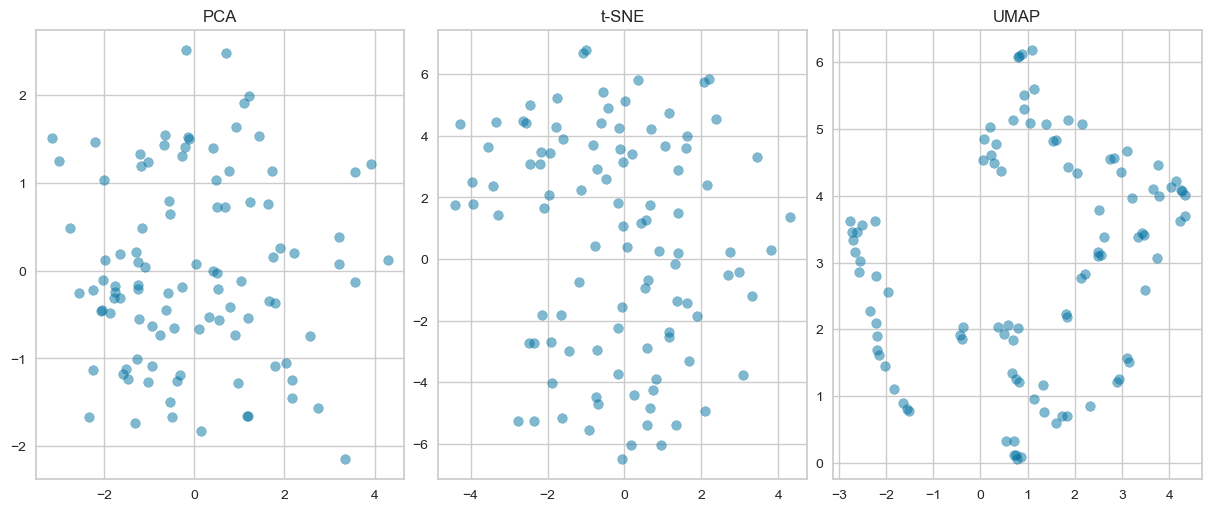

In [205]:
#Dimension reduction analysis
#Evaluate performance of different dimension reduction approaches for our model.
#Based on this, we can see that UMAP is probably the best dimension reducer to use for our model 
#UMAP reduces the data and clusters are more visible than in others. It also shows linear trend that could be helpful in clustering 
plt.rcParams['figure.figsize'] = [12, 5]

reducers = [PCA(), TSNE(), UMAP(n_neighbors=5, min_dist=0.0)]
reducers_names = ['PCA', 't-SNE', 'UMAP']

fig, axs = plt.subplots(1, 3, constrained_layout=True)

for i in range(3):
    embedding = reducers[i].fit_transform(scaled_data)
    x_vals = embedding[:, 0]
    y_vals = embedding[:, 1]
    axs[i].scatter(x_vals, y_vals, alpha=0.5)
    axs[i].set_title(reducers_names[i])
    

In [202]:
reducer= UMAP(n_neighbors=5, min_dist=0.0)

# KMeans clustering model

/Users/andreavelazquez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


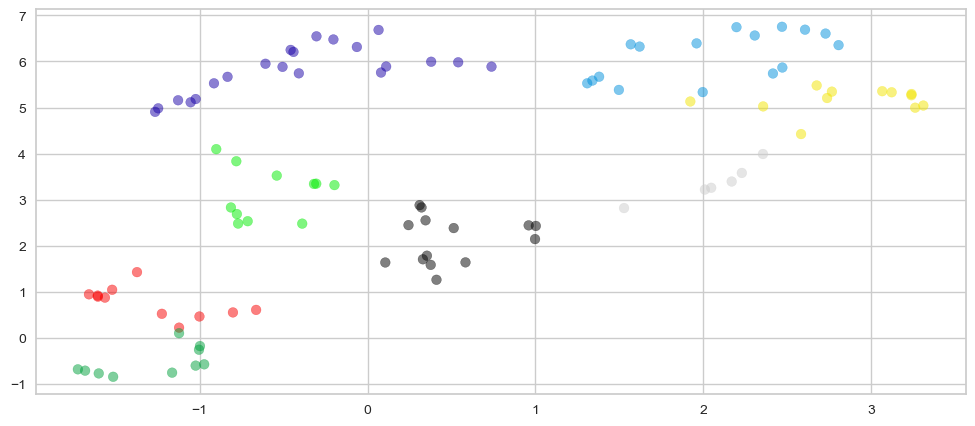

In [203]:
embedding = reducer.fit_transform(scaled_data)
x_vals = embedding[:, 0]
y_vals = embedding[:, 1]

cluster_model = KMeans()

labels = cluster_model.fit_predict(embedding)
plt.scatter(x_vals, y_vals, c=labels, cmap='nipy_spectral', alpha=0.5)

# HDBSCAN clustering model

/Users/andreavelazquez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andreavelazquez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andreavelazquez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


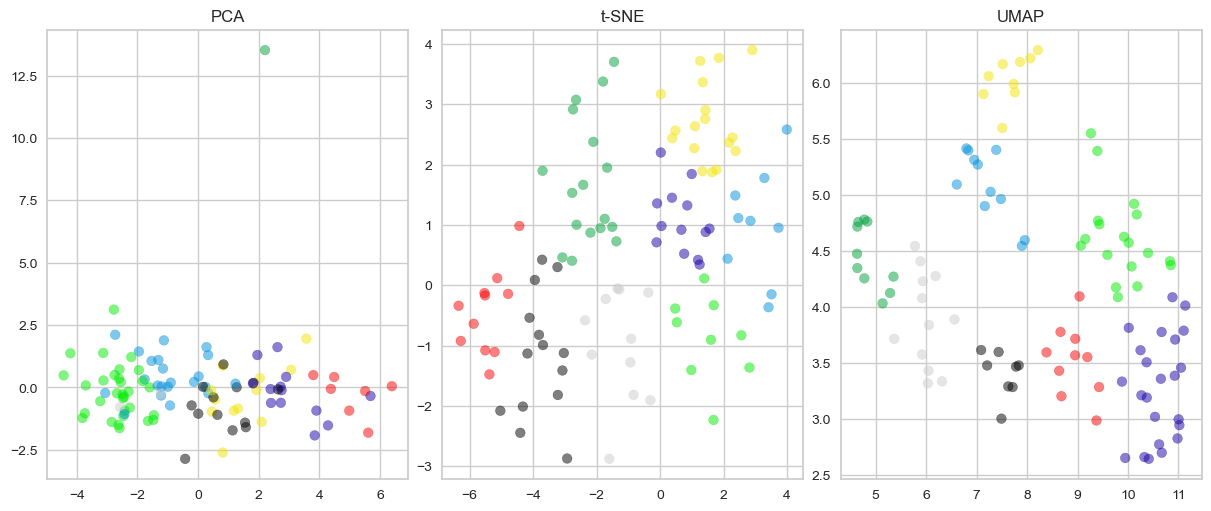

In [195]:
#CLUSTERING MODEL USING HDBSCAN 
plt.rcParams['figure.figsize'] = [12, 5]

model = HDBSCAN()

reducers = [
    PCA(),
    TSNE(),
    UMAP(n_neighbors=5, min_dist=0.0)
]
reducers_names = ['PCA', 't-SNE', 'UMAP']

fig, axs = plt.subplots(1, 3, constrained_layout=True)

    
for i in range(3):
    embedding = reducers[i].fit_transform(scaled_data)
    x_vals = embedding[:, 0]
    y_vals = embedding[:, 1]
    labels = cluster_model.fit_predict(embedding)
    axs[i].scatter(x_vals, y_vals, c=labels, cmap='nipy_spectral', alpha=0.5)
    axs[i].set_title(reducers_names[i])



In [ ]:
#ASSESSING MODELS